In [25]:
import stream2 as st2
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
#adata = sc.read("/home/a.blanc-boekholt/Documents/Singlecell-R/Scripts/Matrix/data_p3.h5ad")
#if 'neighbors' in adata.uns:
#    if 'distances' in adata.uns['neighbors']:
#        adata.obsp['distances'] = adata.uns['neighbors'].pop('distances')
#    if 'connectivities' in adata.uns['neighbors']:
#        adata.obsp['connectivities'] = adata.uns['neighbors'].pop('connectivities')

#adata.write("data_inter.h5ad")
#print(adata)

In [27]:
adata = sc.read("/home/a.blanc-boekholt/Documents/Singlecell-R/Scripts/Matrix/p3.h5ad")

/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/anndata/_io/h5ad.py:266: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  return AnnData(**{


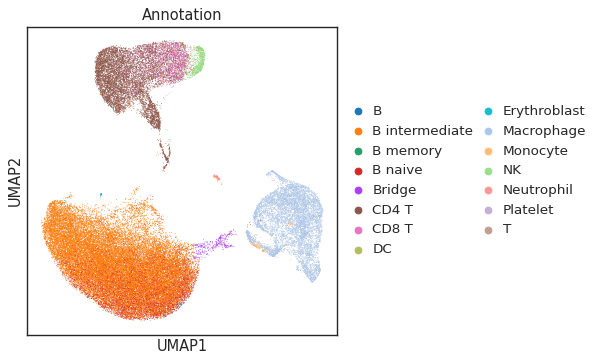

In [28]:
sc.pl.umap(adata,color=['Annotation'])

/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_plot.py:940: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if ann in adata.obs_keys():


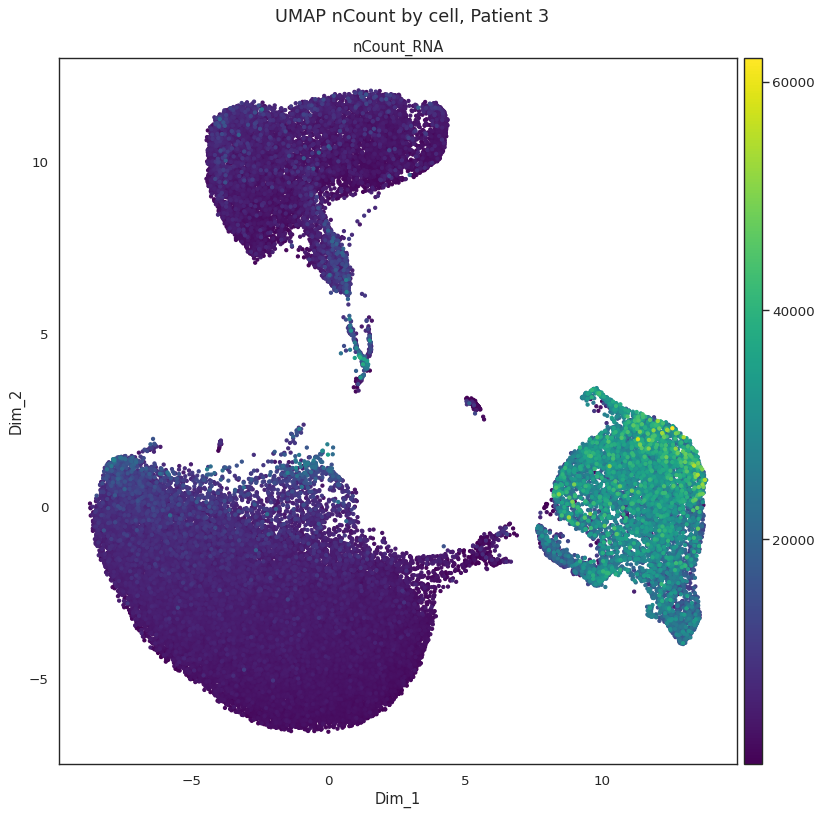

In [29]:
adata.obsm['X_dr'] = adata.obsm['X_umap']
st2.settings.set_figure_params(dpi=80,
                              style='white',
                              fig_size=[5,5],
                              rc={'image.cmap': 'viridis'})

st2.pl.dimension_reduction(adata,color=['nCount_RNA'],
                           fig_legend_ncol=2, fig_size=(10,10))
plt.suptitle("UMAP nCount by cell, Patient 3", fontsize=16, y=1.02)
plt.savefig("/home/a.blanc-boekholt/Documents/Singlecell-R/Scripts/Plots/ncount_p3.png", dpi=300, bbox_inches='tight')

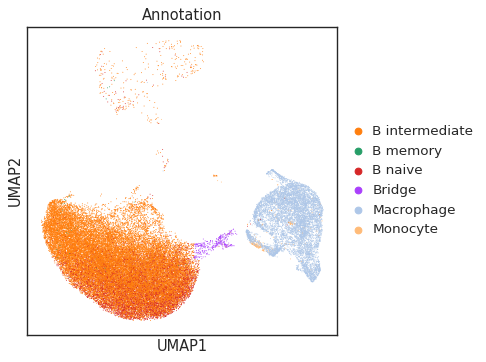

In [30]:
cell_types_to_keep = [ 'B intermediate', 'B memory', 'B naive', 'Monocyte', 'Macrophage','Bridge']
adata = adata[adata.obs['Annotation'].isin(cell_types_to_keep)].copy()
sc.pl.umap(adata,color=['Annotation'])

Found 1 components


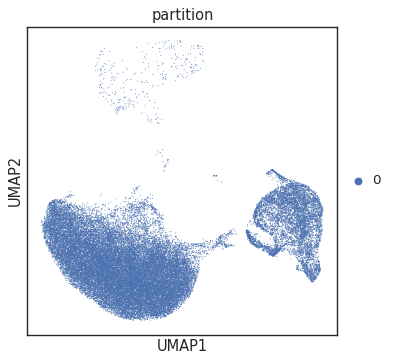

In [31]:
sc.pp.neighbors(adata,use_rep='X_pca')
sc.tl.leiden(adata)
st2.tl.find_disconnected_components(adata,groups='leiden')
sc.pl.umap(adata,color='partition')

<Axes: xlabel='partition'>

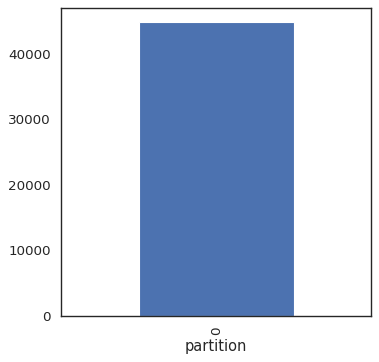

In [32]:
adata.obs['partition'].value_counts().plot.bar()

Seeding initial graph for each partition...
Learning elastic principal graph for each partition...


/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_plot.py:1110: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if ann in adata.obs_keys():


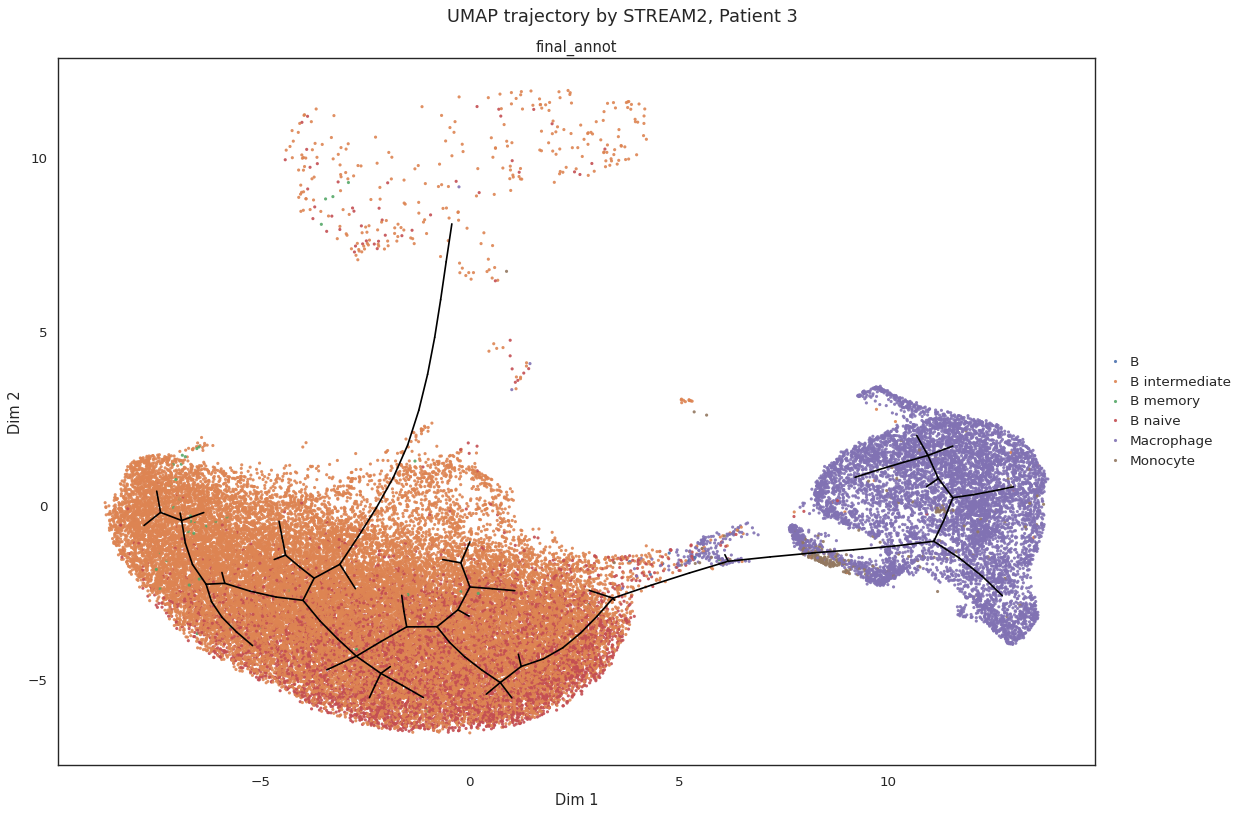

In [33]:
use_partition=['0']
st2.tl.seed_graph(adata, obsm='X_umap', n_clusters=100,use_partition=use_partition)
st2.tl.learn_graph(adata, obsm='X_umap', n_nodes=60,epg_alpha=0.01,epg_mu=0.2,use_partition=use_partition)
st2.pl.graph(adata,key='epg',color=['final_annot'],fig_size=(15,10),save_fig=False)
plt.suptitle("UMAP trajectory by STREAM2, Patient 3", fontsize=16, y=1.02)
plt.savefig("/home/a.blanc-boekholt/Documents/Singlecell-R/Scripts/Plots/graph_p3.png", dpi=300, bbox_inches='tight')

/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_plot.py:1110: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if ann in adata.obs_keys():


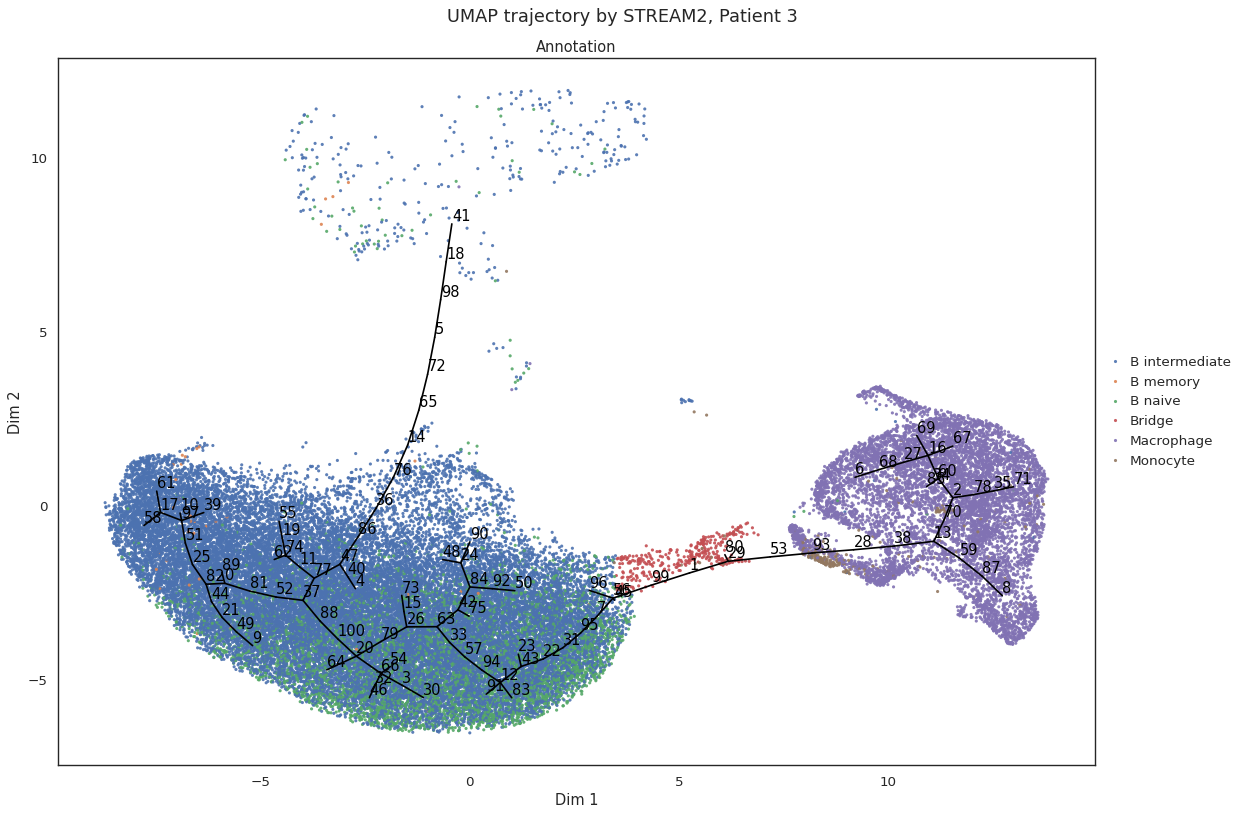

In [34]:
st2.tl._elpigraph._store_graph_attributes(adata,adata.obsm['X_umap'],'epg')
st2.pl.graph(adata,key='epg',color=['Annotation'],show_text=True,fig_size=(15,10),save_fig=False)
plt.suptitle("UMAP trajectory by STREAM2, Patient 3", fontsize=16, y=1.02)
plt.savefig("/home/a.blanc-boekholt/Documents/Singlecell-R/Scripts/Plots/graph_v2_p3.png", dpi=300, bbox_inches='tight')

/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_plot.py:1110: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if ann in adata.obs_keys():


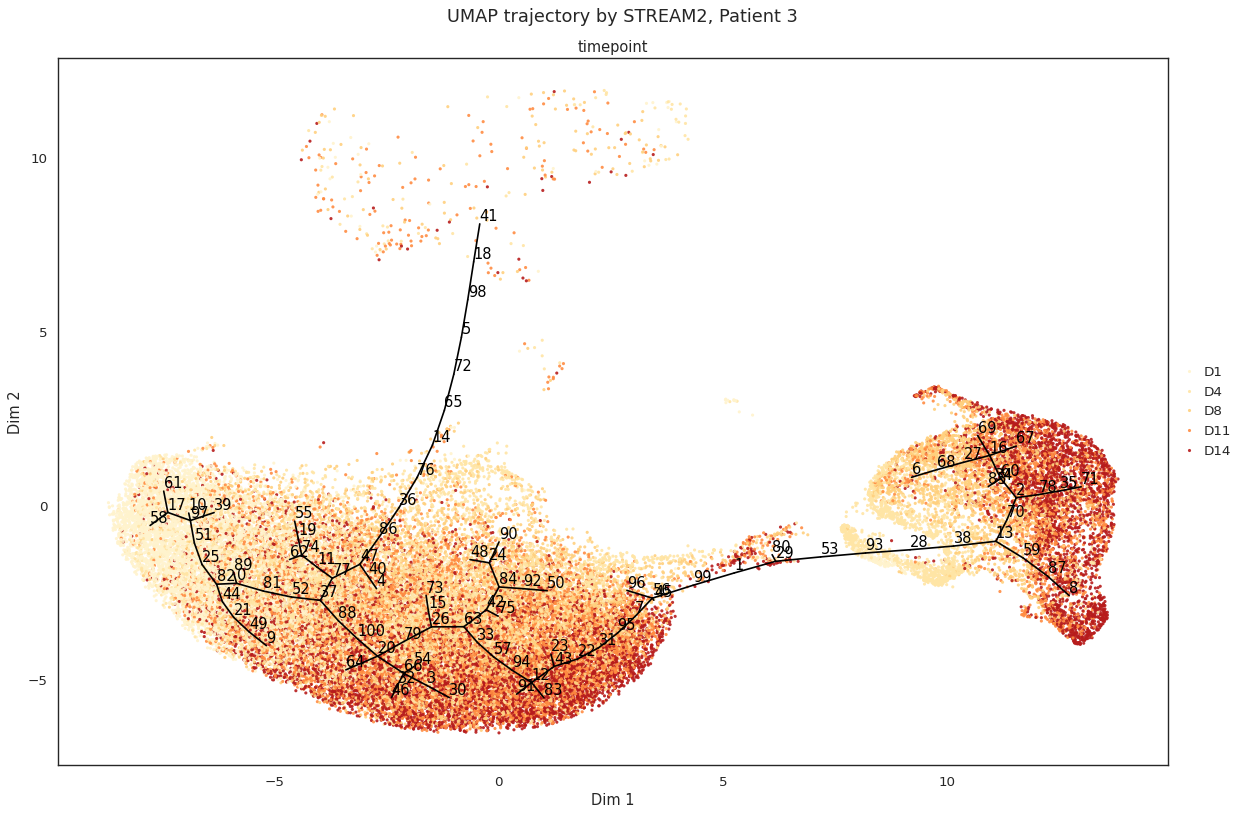

In [36]:
fig_legend_order = {
    'timepoint': ['D1', 'D4', 'D8', 'D11', 'D14']
}

dict_palette = {
    'timepoint': {
        'D1':  '#FFF3CD',
        'D4':  '#FFE5A5',
        'D8':  '#FFD07E',
        'D11': '#FF8C42',
        'D14': '#B71C1C'
    }
}

st2.pl.graph(
    adata,
    key='epg',
    color=['timepoint'],
    dict_palette=dict_palette,
    fig_legend_order=fig_legend_order,
    show_text=True,
    fig_size=(15,10),
    save_fig=False
)

plt.suptitle("UMAP trajectory by STREAM2, Patient 3", fontsize=16, y=1.02)
plt.savefig("/home/a.blanc-boekholt/Documents/Singlecell-R/Scripts/Plots/graph_time_p3.png", dpi=300, bbox_inches='tight')

In [48]:
st2.tl.seed_graph(adata, obsm='X_dr', n_clusters=15)
st2.tl.learn_graph(adata, obsm='X_dr', n_nodes=20, method='principal_tree',)

Seeding initial graph...
Clustering...
K-Means clustering ...
Calculating minimum spanning tree...


/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_plot.py:1110: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if ann in adata.obs_keys():


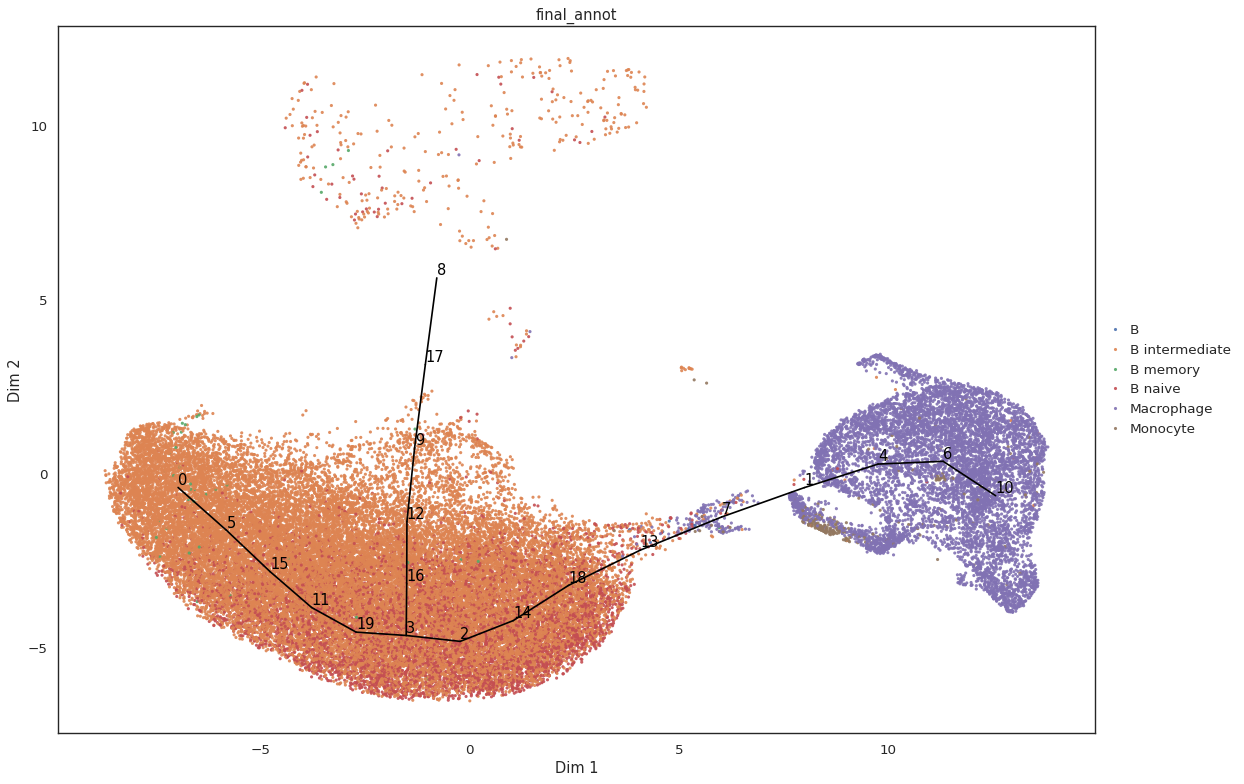

In [49]:
st2.pl.graph(adata,key='epg',color=['final_annot'],show_text=True,fig_size=(15,10),save_fig=False)

/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_plot.py:1434: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if ann in adata.obs_keys():
/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_plot.py:1434: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if ann in adata.obs_keys():


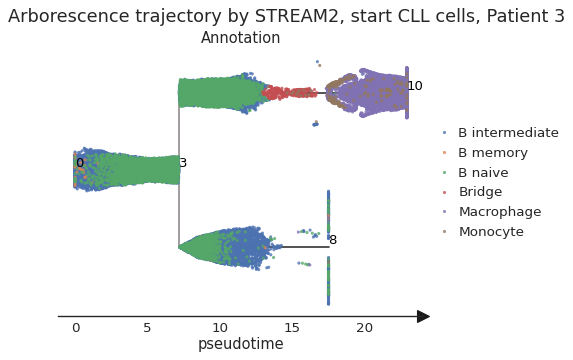

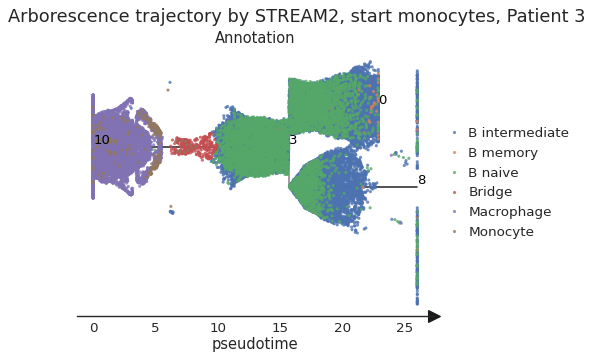

In [54]:
st2.pl.stream_sc(adata, source=0, 
                 dist_scale=0.2, 
                 color=['Annotation'],
                 fig_ncol=2,
                 fig_legend_ncol=1,
                 save_fig=False)
plt.suptitle("Arborescence trajectory by STREAM2, start CLL cells, Patient 3", fontsize=16, y=1.02)
plt.savefig("/home/a.blanc-boekholt/Documents/Singlecell-R/Scripts/Plots/p3_arbo_cll.png", dpi=300, bbox_inches='tight')
st2.pl.stream_sc(adata, source=10, 
                 dist_scale=0.8, 
                 color=['Annotation'],
                 fig_legend_ncol=1)
plt.suptitle("Arborescence trajectory by STREAM2, start monocytes, Patient 3", fontsize=16, y=1.02)
plt.savefig("/home/a.blanc-boekholt/Documents/Singlecell-R/Scripts/Plots/p3_arbo_mono.png", dpi=300, bbox_inches='tight')

In [52]:
adata.uns['stream_tree']['node']

array([ 0,  3,  8, 10])

/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_utils_stream.py:370: FutureWarning: Use uns (e.g. `k in adata.uns` or `sorted(adata.uns)`) instead of AnnData.uns_keys, AnnData.uns_keys is deprecated and will be removed in the future.
  if 'stream_tree' not in adata.uns_keys():
/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_utils_stream.py:399: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the ass

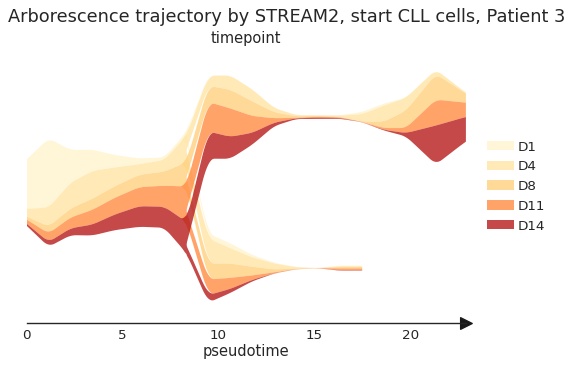

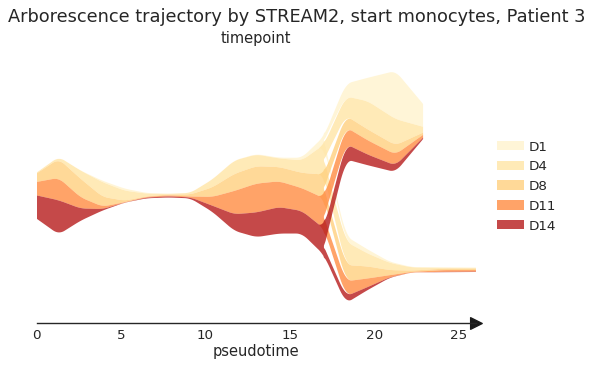

In [53]:
fig_legend_order = {
    'timepoint': ['D1', 'D4', 'D8', 'D11', 'D14']
}

dict_palette = {
    'timepoint': {
        'D1':  '#FFF3CD',
        'D4':  '#FFE5A5',
        'D8':  '#FFD07E',
        'D11': '#FF8C42',
        'D14': '#B71C1C'
    }
}

st2.pl.stream(adata, source=0, 
                 dist_scale=0.8, 
                 color=['timepoint'], dict_palette=dict_palette,
                 fig_legend_order=fig_legend_order,
                 fig_legend_ncol=1)
plt.suptitle("Arborescence trajectory by STREAM2, start CLL cells, Patient 3", fontsize=16, y=1.02)
plt.savefig("/home/a.blanc-boekholt/Documents/Singlecell-R/Scripts/Plots/p3_arbo_time_cll.png", dpi=300, bbox_inches='tight')

st2.pl.stream(adata, source=10, 
                 dist_scale=0.8, 
                 color=['timepoint'], dict_palette=dict_palette,
                 fig_legend_order=fig_legend_order,
                 fig_legend_ncol=1)
plt.suptitle("Arborescence trajectory by STREAM2, start monocytes, Patient 3", fontsize=16, y=1.02)
plt.savefig("/home/a.blanc-boekholt/Documents/Singlecell-R/Scripts/Plots/p3_arbo_time_mono.png", dpi=300, bbox_inches='tight')

Compare pseudotime, trajectory and timepoint on macrophages population

In [58]:
adata = sc.read("/home/a.blanc-boekholt/Documents/Singlecell-R/Scripts/Matrix/p3.h5ad")
cell_types_to_keep = ['Macrophage']
adata = adata[adata.obs['Annotation'].isin(cell_types_to_keep)].copy()

/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/anndata/_io/h5ad.py:266: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  return AnnData(**{


In [59]:
sc.pp.neighbors(adata,use_rep='X_pca')
sc.tl.leiden(adata)
st2.tl.find_disconnected_components(adata,groups='leiden')

Found 1 components


Seeding initial graph for each partition...
Learning elastic principal graph for each partition...


/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_plot.py:1110: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if ann in adata.obs_keys():


Text(0.5, 1.02, 'UMAP trajectory by STREAM2, Patient 3')

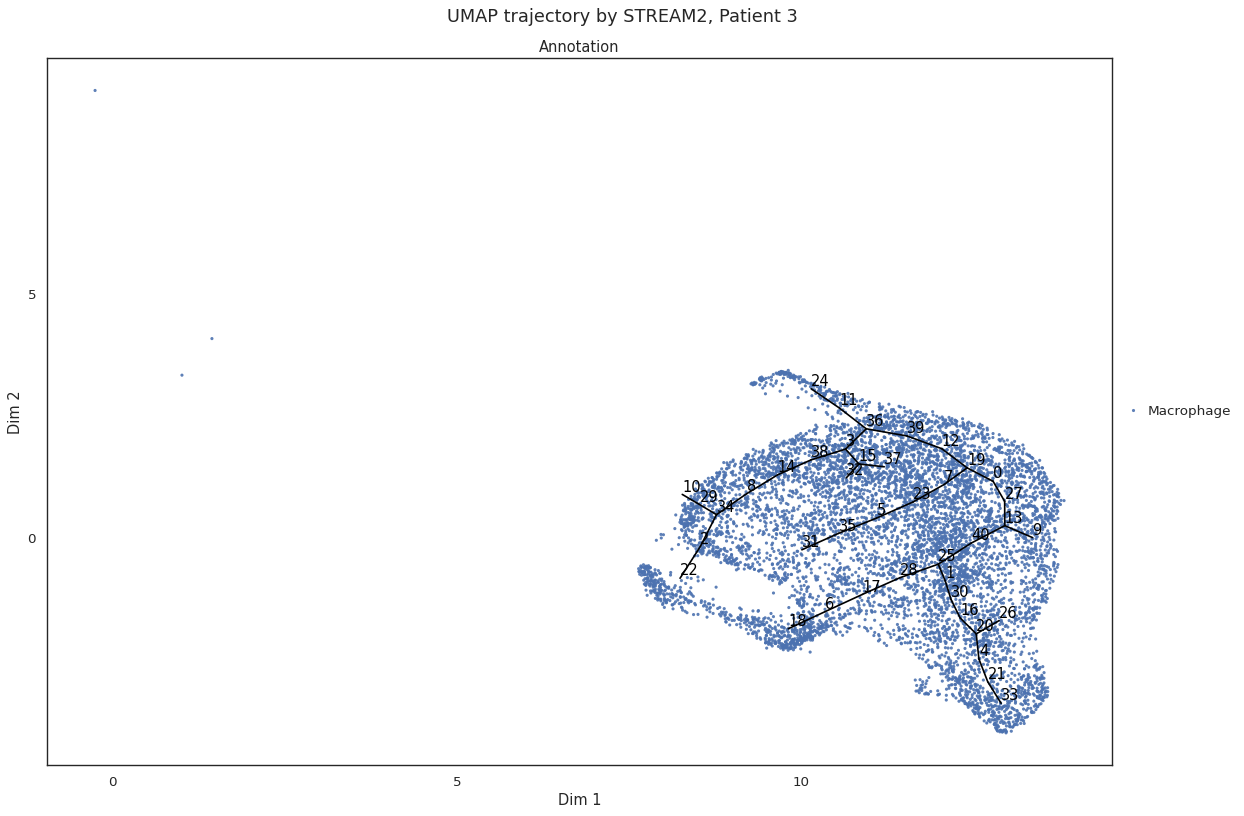

In [62]:
use_partition=['0']
st2.tl.seed_graph(adata, obsm='X_umap', n_clusters=40,use_partition=use_partition)
st2.tl.learn_graph(adata, obsm='X_umap', n_nodes=30,epg_alpha=0.01,epg_mu=0.2,use_partition=use_partition)
st2.tl._elpigraph._store_graph_attributes(adata,adata.obsm['X_umap'],'epg')
#plt.savefig("/home/a.blanc-boekholt/Documents/Singlecell-R/Scripts/Plots/graph_v2_p3.png", dpi=300, bbox_inches='tight')

/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_plot.py:1110: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if ann in adata.obs_keys():


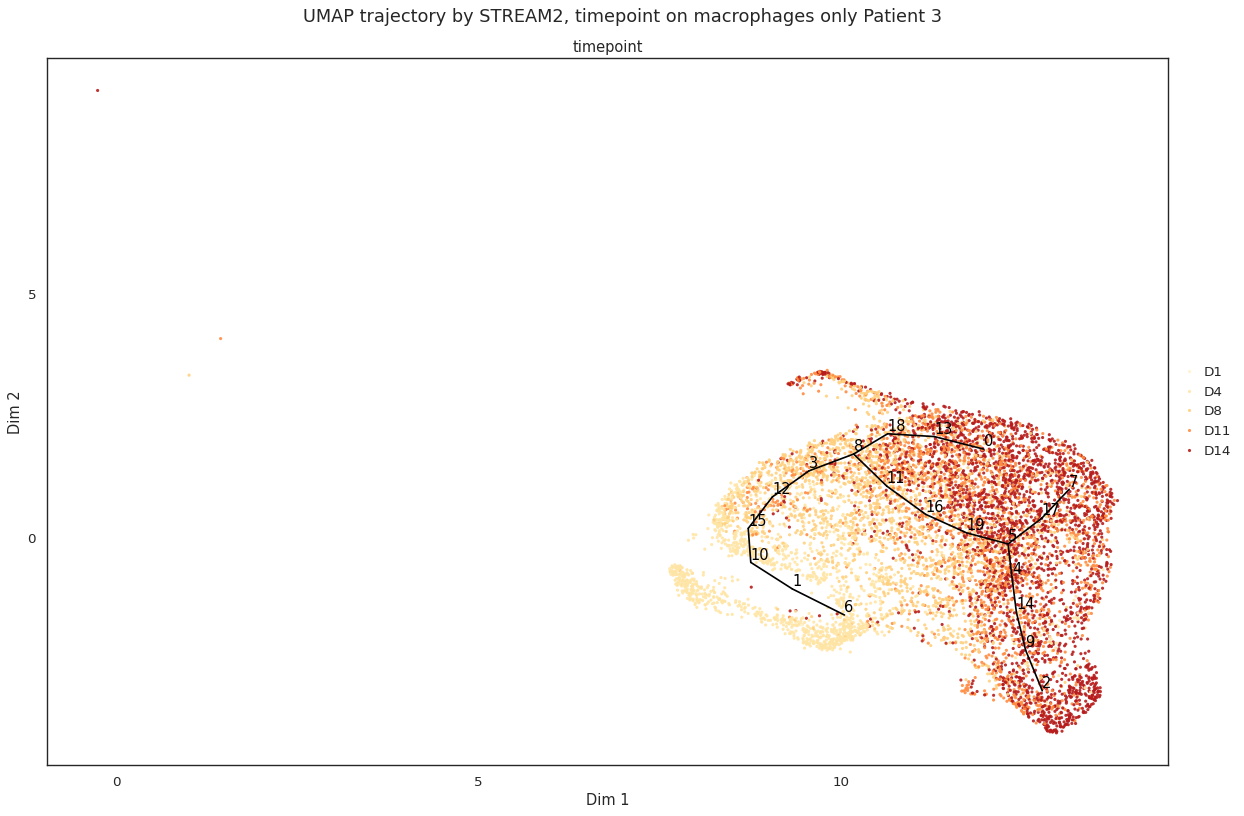

In [74]:
fig_legend_order = {
    'timepoint': ['D1', 'D4', 'D8', 'D11', 'D14']
}

dict_palette = {
    'timepoint': {
        'D1':  '#FFF3CD',
        'D4':  '#FFE5A5',
        'D8':  '#FFD07E',
        'D11': '#FF8C42',
        'D14': '#B71C1C'
    }
}

st2.pl.graph(
    adata,
    key='epg',
    color=['timepoint'],
    dict_palette=dict_palette,
    fig_legend_order=fig_legend_order,
    show_text=True,
    fig_size=(15,10),
    save_fig=False
)

plt.suptitle("UMAP trajectory by STREAM2, timepoint on macrophages only Patient 3", fontsize=16, y=1.02)
plt.savefig("/home/a.blanc-boekholt/Documents/Singlecell-R/Scripts/Plots/graph_time_macro_p3.png", dpi=300, bbox_inches='tight')

In [66]:
adata.obsm['X_dr'] = adata.obsm['X_umap']
st2.tl.seed_graph(adata, obsm='X_dr', n_clusters=15)
st2.tl.learn_graph(adata, obsm='X_dr', n_nodes=20, method='principal_tree',)

Seeding initial graph...
Clustering...
K-Means clustering ...
Calculating minimum spanning tree...


In [69]:
adata.uns['stream_tree']

KeyError: 'stream_tree'

/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_plot.py:1110: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if ann in adata.obs_keys():


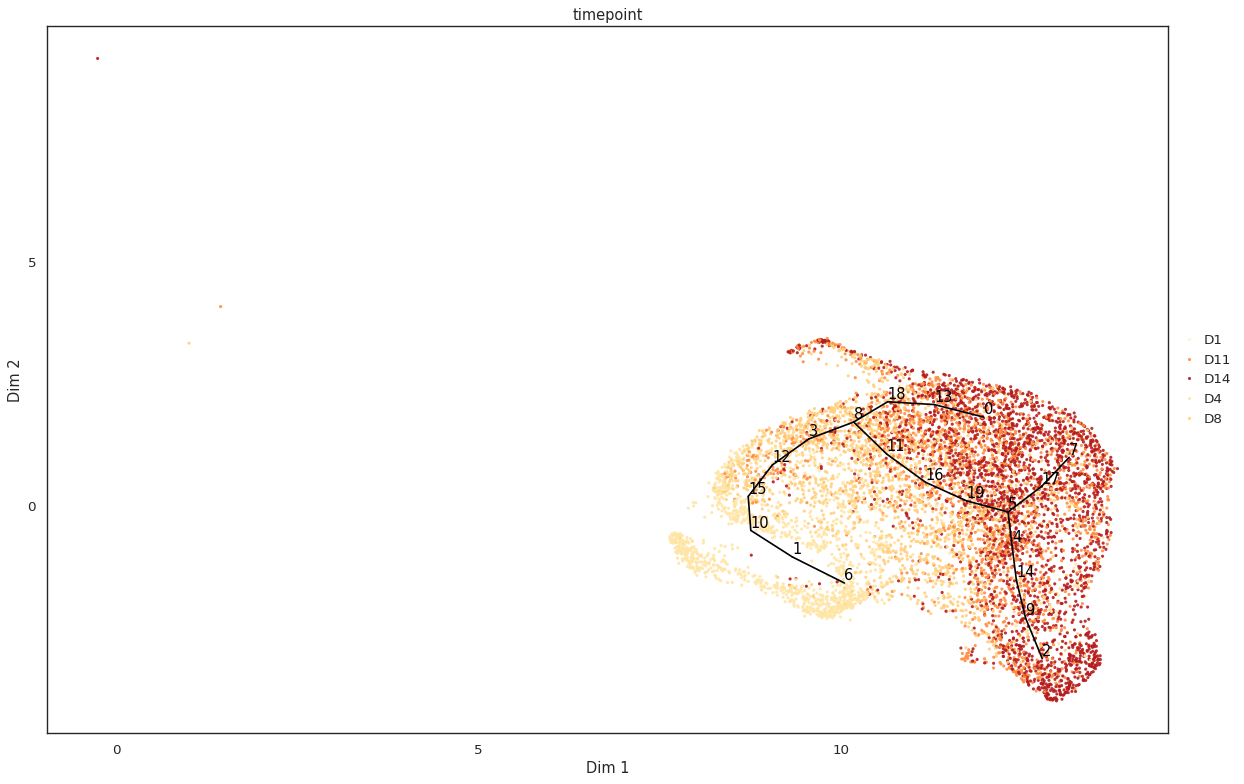

In [67]:
st2.pl.graph(adata,key='epg',color=['timepoint'],show_text=True,fig_size=(15,10),save_fig=False)

/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_utils_stream.py:370: FutureWarning: Use uns (e.g. `k in adata.uns` or `sorted(adata.uns)`) instead of AnnData.uns_keys, AnnData.uns_keys is deprecated and will be removed in the future.
  if 'stream_tree' not in adata.uns_keys():
/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_utils_stream.py:399: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the ass

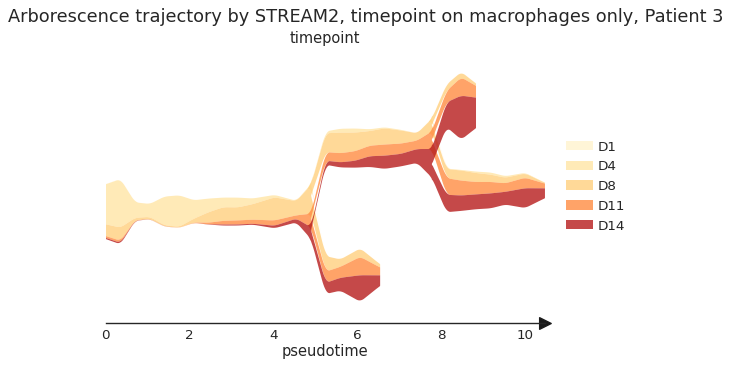

In [73]:
st2.pl.stream(adata, source=6, 
                 dist_scale=0.8, 
                 color=['timepoint'], dict_palette=dict_palette,
                 fig_legend_order=fig_legend_order,
                 fig_legend_ncol=1)
plt.suptitle("Arborescence trajectory by STREAM2, timepoint on macrophages only, Patient 3", fontsize=16, y=1.02)
plt.savefig("/home/a.blanc-boekholt/Documents/Singlecell-R/Scripts/Plots/p3_arbo_time_macro.png", dpi=300, bbox_inches='tight')